<a href="https://colab.research.google.com/github/Muzzarino2811/20_MuzzarinoAkbar/blob/main/Week7KTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Gamma Correction + Denoising menggunakan Gaussian Blur

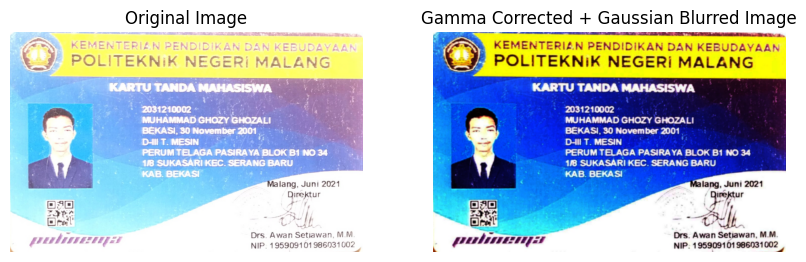

In [88]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img_path = '/content/drive/MyDrive/PCVK/Images/UTSPCVK.jpg'
image = cv2.imread(img_path)

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Gamma Correction
gamma = 0.2
invGamma = 1.0 / gamma
table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)], dtype="uint8")
image_gamma_corrected = cv2.LUT(image_rgb, table)

# Denoising menggunakan Gaussian Blur
kernel_size = (5, 5)  # Ukuran kernel
sigma = 1.5  # Sigma untuk Gaussian
image_denoised = cv2.GaussianBlur(image_gamma_corrected, kernel_size, sigma)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_denoised)
plt.title('Gamma Corrected + Gaussian Blurred Image')
plt.axis('off')

plt.show()


* Gamma Correction + Denoising menggunakan library cv2 yaitu cv2.fastNlMeansDenoisingColored

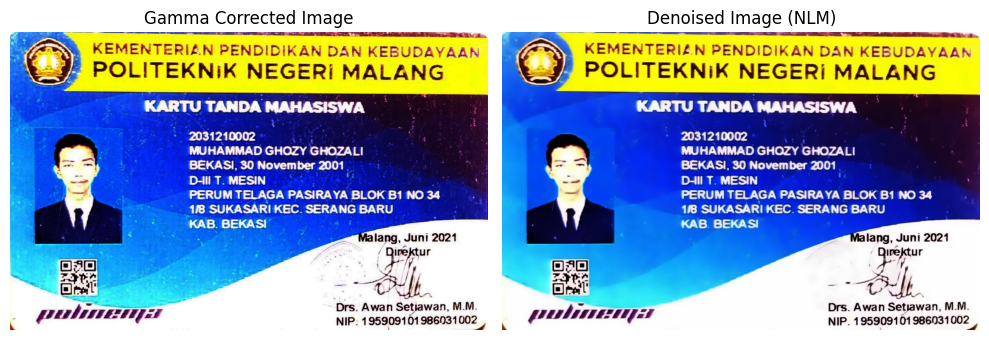

In [92]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img_path = '/content/drive/MyDrive/PCVK/Images/UTSPCVK.jpg'
image = cv2.imread(img_path)

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Gamma Correction
gamma = 0.2
invGamma = 1.0 / gamma
table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)], dtype="uint8")
image_gamma_corrected = cv2.LUT(image_rgb, table)

# Denoising menggunakan NLM
image_denoised = cv2.fastNlMeansDenoisingColored(image_gamma_corrected, None, 15, 15, 7, 25)

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_gamma_corrected)
plt.title('Gamma Corrected Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_denoised)
plt.title('Denoised Image (NLM)')
plt.axis('off')

plt.tight_layout()
plt.show()


2. Histogram Equalization

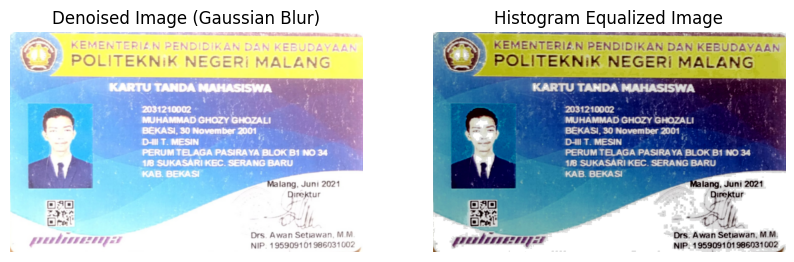

In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img_path = '/content/drive/MyDrive/PCVK/Images/UTSPCVK.jpg'
image = cv2.imread(img_path)

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Denoising menggunakan Gaussian Blur
kernel_size = (5, 5)  # Ukuran kernel
sigma = 1.5  # Sigma untuk Gaussian
image_denoised = cv2.GaussianBlur(image_rgb, kernel_size, sigma)

# Histogram Equalization (hanya pada channel Y untuk ruang warna YUV)
image_yuv = cv2.cvtColor(image_denoised, cv2.COLOR_RGB2YUV)
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])  # Equalize pada channel Y
image_equalized = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_denoised)
plt.title('Denoised Image (Gaussian Blur)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_equalized)
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.show()


3. Konvulsi

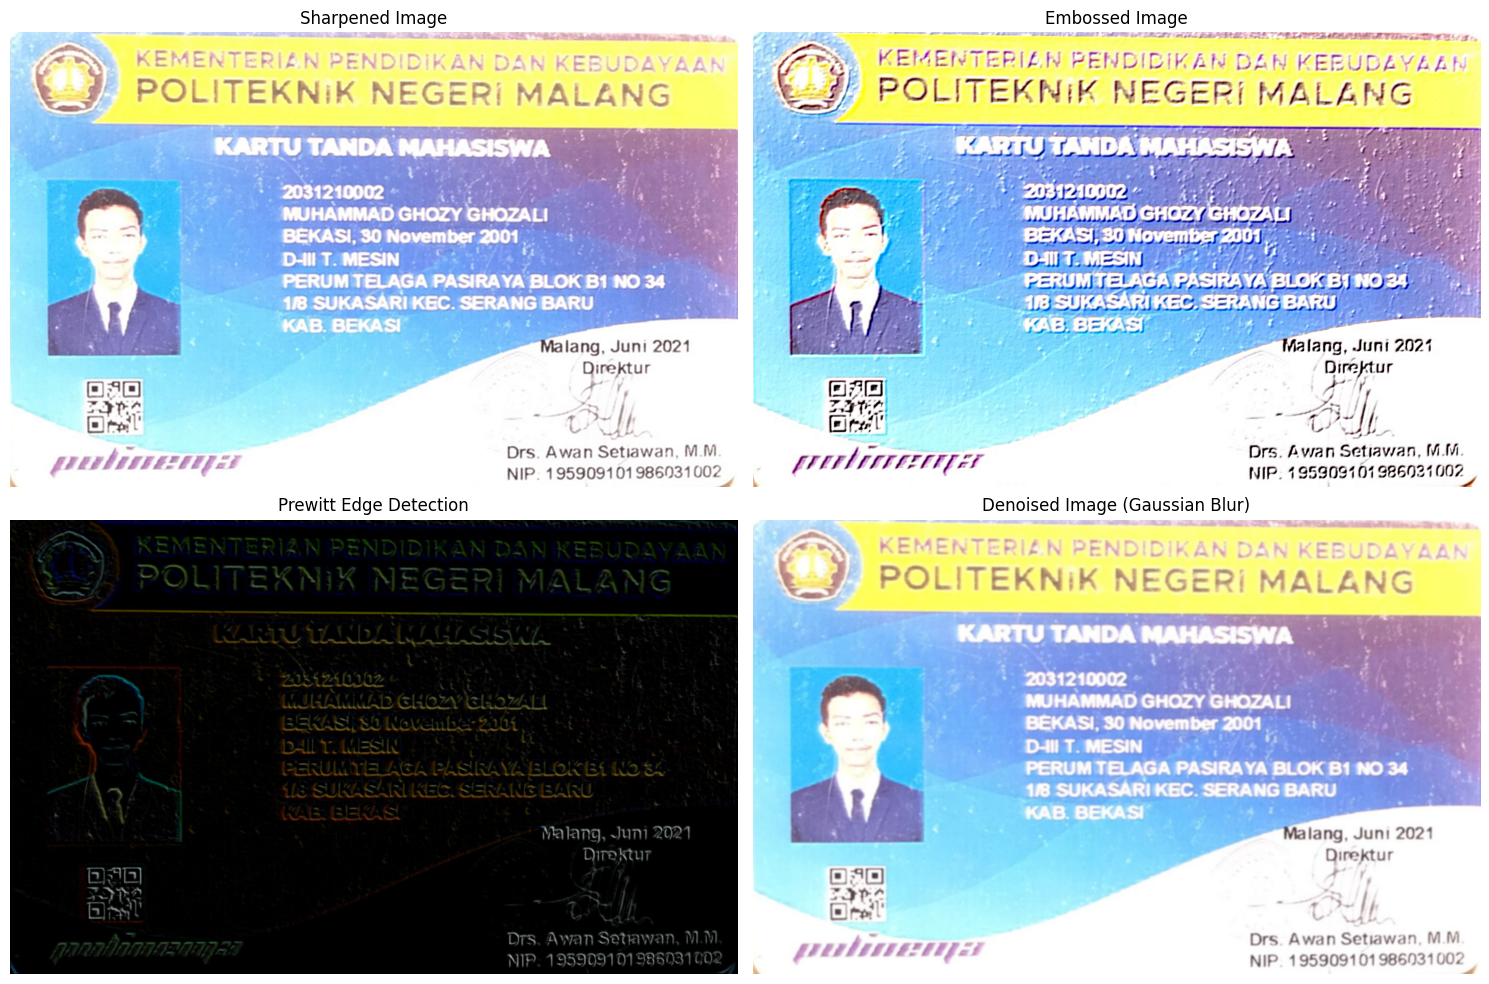

In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img_path = '/content/drive/MyDrive/PCVK/Images/UTSPCVK.jpg'
image = cv2.imread(img_path)

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Denoising menggunakan Gaussian Blur
kernel_size = (5, 5)  # Ukuran kernel
sigma = 1.5  # Sigma untuk Gaussian
image_denoised = cv2.GaussianBlur(image_rgb, kernel_size, sigma)

# 1. Sharpening Kernel
sharpen_kernel = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])

# 2. Emboss Kernel
emboss_kernel = np.array([[ -2, -1, 0],
                           [ -1,  1, 1],
                           [  0,  1, 2]])

# 3. Prewitt Edge Detection Kernels
prewitt_x_kernel = np.array([[ -1, 0, 1],
                              [ -1, 0, 1],
                              [ -1, 0, 1]])

prewitt_y_kernel = np.array([[  1,  1,  1],
                              [  0,  0,  0],
                              [ -1, -1, -1]])

# Konvolusi
image_sharpened = cv2.filter2D(image_denoised, -1, sharpen_kernel)
image_embossed = cv2.filter2D(image_denoised, -1, emboss_kernel)
image_prewitt_x = cv2.filter2D(image_denoised, -1, prewitt_x_kernel)
image_prewitt_y = cv2.filter2D(image_denoised, -1, prewitt_y_kernel)

# Menggabungkan hasil Prewitt
image_prewitt = cv2.addWeighted(image_prewitt_x, 0.5, image_prewitt_y, 0.5, 0)

# Display results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(image_sharpened)
plt.title('Sharpened Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(image_embossed)
plt.title('Embossed Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(image_prewitt)
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image_denoised)
plt.title('Denoised Image (Gaussian Blur)')
plt.axis('off')

plt.tight_layout()
plt.show()


4. Operasi Aritmatika

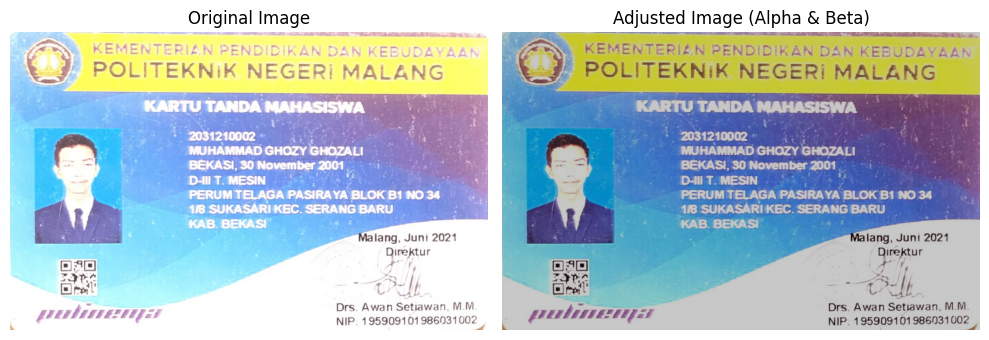

In [110]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img_path = '/content/drive/MyDrive/PCVK/Images/UTSPCVK.jpg'
image = cv2.imread(img_path)

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Parameter untuk operasi aritmatika
alpha = 1.0  # Faktor untuk kontras (nilai > 1 meningkatkan kontras)
beta = -55  # Nilai untuk kecerahan (nilai positif meningkatkan kecerahan)

# Operasi Aritmatika
image_adjusted = cv2.convertScaleAbs(image_rgb, alpha=alpha, beta=beta)

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_adjusted)
plt.title('Adjusted Image (Alpha & Beta)')
plt.axis('off')

plt.tight_layout()
plt.show()
